In [56]:
import pandas as pd
import numpy as np
np.set_printoptions(precision=4)
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


In [57]:
dataset = pd.read_csv("dataChecked.csv") 
dataset.head()
X = dataset.iloc[:, 0:6]
y = dataset.iloc[:, 6]
X.shape
X.head()
donnes = { "dataset":dataset,"target_names": np.array(['y','n'])}

In [58]:
y.head()

0    y
1    y
2    y
3    y
4    y
Name: Genuine, dtype: object

In [59]:
dataset.head()

,Length,Height (left),Height (right),Inner Frame (lower),Inner Frame (upper),Diagonal,Genuine
0,214.8,131.0,131.1,9.0,9.7,141.0,y
1,214.6,129.7,129.7,8.1,9.5,141.7,y
2,214.8,129.7,129.7,8.7,9.6,142.2,y
3,214.8,129.7,129.6,7.5,10.4,142.0,y
4,215.0,129.6,129.7,10.4,7.7,141.8,y


In [60]:
df = X.join(pd.Series(y, name='Genuine'))
class_feature_means = pd.DataFrame(columns=donnes["target_names"])
for c, rows in df.groupby('Genuine'):
    class_feature_means[c] = rows.mean()
class_feature_means

,y,n
Length,214.969,214.823
Height (left),129.943,130.300
Height (right),129.720,130.193
Inner Frame (lower),8.305,10.530
Inner Frame (upper),10.168,11.133
Diagonal,141.517,139.450


In [61]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X, y)

print("la variance expliquée par chaque composant ",lda.explained_variance_ratio_)


la variance expliquée par chaque composant  [1.]


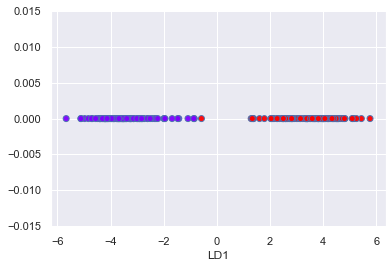

In [68]:
df = X.join(pd.Series(y, name='class'))
le = LabelEncoder()
y = le.fit_transform(df['class'])

plt.xlabel('LD1')
plt.scatter(
    X_lda[:,0],
    np.zeros(200),
    c=y,
    cmap='rainbow',
    alpha=0.95,
    edgecolors='b'
)


In [63]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X, y)
print ("la variance expliquée par chaque composant",pca.explained_variance_ratio_)
df = X.join(pd.Series(y, name='class'))
le = LabelEncoder()
y = le.fit_transform(df['class'])


la variance expliquée par chaque composant [0.6675 0.2082]


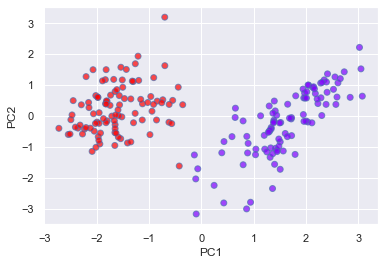

In [64]:
plt.xlabel ('PC1') 
plt.ylabel ('PC2') 
plt.scatter ( 
    X_pca [:, 0], 
    X_pca [:, 1], 
    c = y, 
    cmap = 'rainbow', 
    alpha = 0.7, 
    edgecolors = "b" 
)

In [65]:
print('l affectation de lelement 1 est ',lda.predict([[215.1, 130.0, 129.8 ,9.1 ,10.2, 141.5 ]]))
print('l affectation de lelement 2 est ',lda.predict([[214.7 ,130.7 ,130.8, 11.2 ,11.2, 139.4  ]]))
print('l affectation de lelement 3 est ',lda.predict([[214.3, 129.9, 129.9 ,10.2, 11.5 ,139.6 ]]))
print('l affectation de lelement 4 est ',lda.predict([[214.7 ,130.0 ,129.4 ,7.8, 10.0 ,141.2 ]]))

l affectation de lelement 1 est  ['y']
l affectation de lelement 2 est  ['n']
l affectation de lelement 3 est  ['n']
l affectation de lelement 4 est  ['y']


In [69]:
donnes

{'dataset':      Length  Height (left)  Height (right)  Inner Frame (lower)  \
 0     214.8          131.0           131.1                  9.0   
 1     214.6          129.7           129.7                  8.1   
 2     214.8          129.7           129.7                  8.7   
 3     214.8          129.7           129.6                  7.5   
 4     215.0          129.6           129.7                 10.4   
 ..      ...            ...             ...                  ...   
 195   215.0          130.4           130.3                  9.9   
 196   215.1          130.3           129.9                 10.3   
 197   214.8          130.3           130.4                 10.6   
 198   214.7          130.7           130.8                 11.2   
 199   214.3          129.9           129.9                 10.2   
 
      Inner Frame (upper)  Diagonal Genuine  
 0                    9.7     141.0       y  
 1                    9.5     141.7       y  
 2                    9.6     142

In [54]:
donnes["target_names"]

array(['y', 'n'], dtype='<U1')

In [ ]:
#TD

In [72]:
E =np.zeros((3,3))
E[0,0]=980
E[0,1]=409
E[0,2]=70
E[1,0]=409
E[1,1]=188
E[1,2]=30
E[2,0]=70
E[2,1]=30
E[2,2]=6

In [73]:
A = np.linalg.inv(E)

In [74]:
A

array([[ 0.0139, -0.0216, -0.0544],
       [-0.0216,  0.0599, -0.0471],
       [-0.0544, -0.0471,  1.037 ]])

In [75]:
Solution = np.dot(A,E)
Solution

array([[ 1.0000e+00,  9.0206e-16,  1.8041e-16],
       [-8.1463e-15,  1.0000e+00, -1.5266e-16],
       [-5.3291e-15,  1.7764e-15,  1.0000e+00]])

In [77]:
det = np.linalg.det(E)
det

16353.999999999944

In [80]:
vect = np.array([[1002],[382],[72]])
vect

array([[1002],
       [ 382],
       [  72]])

In [81]:
s1 = np.dot(A,vect)
s1

array([[ 1.7823],
       [-2.1883],
       [ 2.148 ]])

In [97]:
Z1 = np.array([10,5,7,19,11,18])
Z2 = np.array([2,3,3,6,7,9])
Y = np.array([15,9,3,25,7,13])
Yichap = np.zeros((6))
result = np.zeros(6)
result1 = np.zeros(6)

In [99]:
for c in range(0,6):
    Yichap[c]=1.78 * Z1[c] - 2.18 * Z2[c] + 2.148
    print(Yichap[c])
    result1[c]=Yichap[c]-Y[c]
    result[c] = (Yichap[c]-12) ** 2
    print("***********")
print(result1)
print(result)

15.588000000000001
***********
4.507999999999999
***********
8.068
***********
22.887999999999998
***********
6.468
***********
14.567999999999998
***********
[ 0.588 -4.492  5.068 -2.112 -0.532  1.568]
[ 12.8737  56.1301  15.4606 118.5485  30.603    6.5946]


In [104]:
for c in range(0,6):
    summ = result[c] ** 2
print(summ/3)

14.496355233791952


In [105]:
print(A*14.5)

[[ 0.2022 -0.3139 -0.7891]
 [-0.3139  0.8689 -0.6827]
 [-0.7891 -0.6827 15.0364]]


In [107]:
0.2 ** (0.5)

0.4472135954999579

In [108]:
1.78/0.45

3.9555555555555557